# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from  sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [5]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [6]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [7]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [8]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [9]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [10]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

# Se rentan mas ciclas cuando es día de trabajo. Lo que nos indica que la renta se utiliza para ir a trabajar y para volver a casa l uego de la jornada laboral.

In [11]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Las hora 4:00pm y 5:00pm son las mas frecuentes, lo que confirma las aseveraciones anteriores, las personas tienden a rentar para volver a casa luego de la jornada laboral. Tambien resaltan la hora 8:00am, es decir al salir hacia el trabajo.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

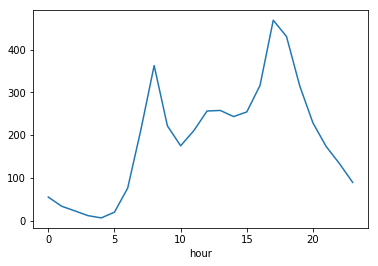

In [12]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

La renta de ciclas se da prioritariamente al salir y al volver del trabajo. Entre 7-9 de la mañana y entre3-6de la tarde respectivamente.

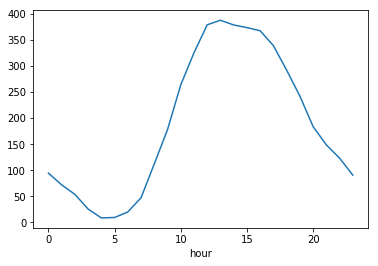

In [13]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

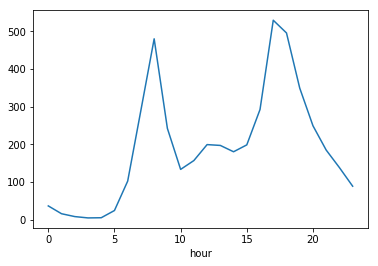

In [14]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

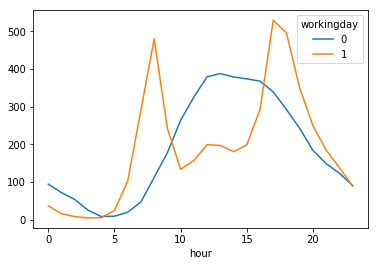

In [15]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

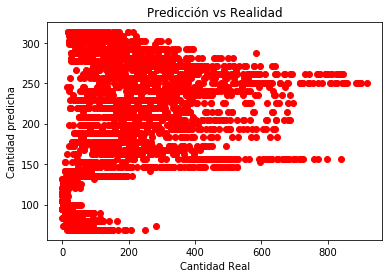

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bikes[['hour','workingday']], bikes['total'], test_size=0.3)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg.coef_
pred=linreg.predict(X_test)

plt.plot(y_test, pred, 'ro')
plt.xlabel("Cantidad Real")
plt.ylabel("Cantidad predicha")
plt.title("Predicción vs Realidad")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

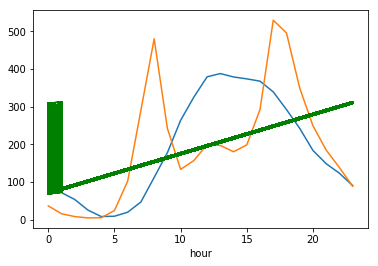

In [17]:
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()
plt.plot(X_test, pred, color='green')
plt.show

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [20]:
# Nuevo dataframe con las variables requeridas en el modelo
datos=bikes[['workingday','hour','total']]
datos.reset_index(inplace=True,drop=True)

In [21]:
#Se crea una función para seleccionar la mejor rama
def minor_branch(train,hora,workingday):
    branch1=0
    branch2=0
    def error_hour(train,hora):
        train['pred'] = train.loc[train.hour<hora, 'total'].mean()
        train.loc[train.hour>=hora, 'pred'] = train.loc[train.hour>=hora, 'total'].mean()
        minhor = ((((train['total'] - train['pred'])**2).mean()) ** 0.5)
        for hora in train.hour.unique():
            train['pred'] = train.loc[train.hour<hora, 'total'].mean()
            train.loc[train.hour>=hora, 'pred'] = train.loc[train.hour>=hora, 'total'].mean()
            minhor1 = ((((train['total'] - train['pred'])**2).mean()) ** 0.5)
            if minhor1 <= minhor:
                minhor = minhor1
                valor = hora
                rama = 0
        return minhor,valor,rama
    def error_workingday(train,workingday):
        train['pred'] = train.loc[train.workingday<workingday, 'total'].mean()
        train.loc[train.workingday>=workingday, 'pred'] = train.loc[train.workingday>=workingday, 'total'].mean()
        minday = ((((train['total'] - train['pred'])**2).mean()) ** 0.5)
        for workingday in datos.workingday.unique():
            train['pred'] = train.loc[train.workingday<workingday, 'total'].mean()
            train.loc[train.workingday>=workingday, 'pred'] = train.loc[train.workingday>=workingday, 'total'].mean()
            minday1 = ((((train['total'] - train['pred'])**2).mean()) ** 0.5)
            if minday1 <= minday:
                valor2 = workingday
                minday = minday1
                rama2 = 1
        return minday,valor2,rama2
    branch1 = error_hour(train,hora)
    branch2 = error_workingday(train,workingday)
    
    if branch1[0] <= branch2[0]:
        return branch1[1],branch1[2],branch1[0]
    else:
        return branch2[1],branch2[2],branch1[0]

In [22]:

#Se crean cantidad de subset de datos requeridos de acuerdo a la produndidad del arbol 
#y variables explicativas del modelo.
a=10 #Profundidad del arbol
b=2  #Cantidad de variables explicativas
c=0
d=0
r1='r1'
r2='r2'
for x in range(1,a+1):
    c=(b**(x-1))
    d=c+d

In [23]:
#Se crean nombres de las ramas del arbol
pre = 'datos'
suf1 = '_izq'
suf2 = '_der'

ramas = pd.Series(index=np.arange(d))
ramas[0]=pre
a=0
for i in range(1,d):
    ramas[i+a]=str(ramas[i-1])+suf1
    ramas[i+a+1]=str(ramas[i-1])+suf2
    a=a+1

In [24]:
#Se definen y crean las ramas del arbol seleccionando las ramas con el criterio de menor mínimo error
results = pd.DataFrame(index=range(100),columns=['Rama_Datos','Fuente','Valor_Particion','Signo','Min_Error','Cantidad_Reg'])

branchs={}

branchs[0]=pd.DataFrame(datos.copy(),columns=datos.columns)
results['Rama_Datos'].iloc[0]=ramas[0]
results['Fuente'].iloc[0]=0
results['Valor_Particion'].iloc[0]=0
results['Signo'].iloc[0]=0
results['Min_Error'].iloc[0]=0
results['Cantidad_Reg'].iloc[0]=len(branchs[0])
a=1
for i in range(19):
    value =minor_branch(branchs[i],branchs[i].hour,branchs[i].workingday)
    if value[1]==0:
        branchs[i+a]=pd.DataFrame(branchs[i].loc[branchs[i].hour<value[0]].copy(),columns=datos.columns)
        branchs[i+a+1]=pd.DataFrame(branchs[i].loc[branchs[i].hour>=value[0]].copy(),columns=datos.columns)
        fuente = 'hour'
        results['Rama_Datos'].iloc[i+a]=ramas[i+a]
        results['Rama_Datos'].iloc[i+a+1]=ramas[i+a+1]
        results['Fuente'].iloc[i+a]=fuente
        results['Fuente'].iloc[i+a+1]=fuente
        results['Valor_Particion'].iloc[i+a]=value[0]
        results['Valor_Particion'].iloc[i+a+1]=value[0]
        results['Signo'].iloc[i+a]='<'
        results['Signo'].iloc[i+a+1]='>='
        results['Min_Error'].iloc[i+a]=round(value[2],2)
        results['Min_Error'].iloc[i+a+1]=round(value[2],2)
        results['Cantidad_Reg'].iloc[i+a]=len(branchs[i].loc[branchs[i].hour<value[0]])
        results['Cantidad_Reg'].iloc[i+a+1]=len(branchs[i].loc[branchs[i].hour>=value[0]])

    else:
        branchs[i+a]=pd.DataFrame(branchs[i].loc[branchs[i].workingday<value[0]].copy(),columns=datos.columns)
        branchs[i+a+1]=pd.DataFrame(branchs[i].loc[branchs[i].workingday>=value[0]].copy(),columns=datos.columns)
        fuente='workingday'
        results['Rama_Datos'].iloc[i+a]=ramas[i+a]
        results['Rama_Datos'].iloc[i+a+1]=ramas[i+a+1]
        results['Fuente'].iloc[i+a]=fuente
        results['Fuente'].iloc[i+a+1]=fuente
        results['Valor_Particion'].iloc[i+a]=value[0]
        results['Valor_Particion'].iloc[i+a+1]=value[0]
        results['Signo'].iloc[i+a]='<'
        results['Signo'].iloc[i+a+1]='>='
        results['Min_Error'].iloc[i+a]=round(value[2],2)
        results['Min_Error'].iloc[i+a+1]=round(value[2],2)
        results['Cantidad_Reg'].iloc[i+a]=len(branchs[i].loc[branchs[i].hour<value[0]])
        results['Cantidad_Reg'].iloc[i+a+1]=len(branchs[i].loc[branchs[i].hour>=value[0]])

    a=a+1
results.head(39)

,Rama_Datos,Fuente,Valor_Particion,Signo,Min_Error,Cantidad_Reg
0,datos,0,0,0,0,10886
1,datos_izq,hour,7,<,150.23,3139
2,datos_der,hour,7,>=,150.23,7747
3,datos_izq_izq,hour,6,<,35.24,2684
4,datos_izq_der,hour,6,>=,35.24,455
5,datos_der_izq,hour,21,<,166.7,6379
6,datos_der_der,hour,21,>=,166.7,1368
7,datos_izq_izq_izq,hour,2,<,27.47,909
8,datos_izq_izq_der,hour,2,>=,27.47,1775
9,datos_izq_der_izq,workingday,1,<,54.69,0


<function matplotlib.pyplot.show(*args, **kw)>

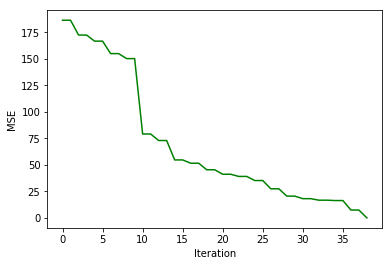

In [25]:
r=results.head(39)
r=r.sort_values(by='Min_Error', ascending=False)
plt.plot(range(39),r.Min_Error , color='green')
plt.ylabel('MSE')
plt.xlabel('Iteration')
plt.show

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [26]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [27]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, bikes[['workingday','hour']], bikes['total'], cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

105.19244713068338

In [28]:
# list of values to try
max_depth_range = range(1, 20)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, bikes[['workingday','hour']], bikes['total'], cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

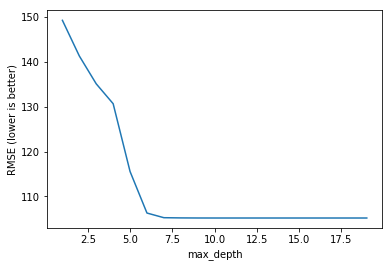

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')